In [1]:
from beewalkvideotrack import BeeTrack

# Demo

In this demo we open the demo movie file, run the algorithm on it, and output some results.

In [2]:
#First, open the video file and store (low-res version) in memory
#bt = BeeTrack('demovideo.mp4',fromframe=40)
bt = BeeTrack('/home/mike/Documents/Research/beebehaviourdata/process/11N_e_vert-G40.mp4',fromframe=0)

Loading frames
..............................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [3]:
#Second, run the analysis, and compute various features.
bt.getpath()
bt.compute_features()

In [4]:
bt.walksegments

,start (frame),end (frame),start (s),end (s),filename,distance (pixels),distance (mm)
0,180,198,7.20,7.92,/home/mike/Documents/Research/beebehaviourdata...,88.161670,None
1,199,213,7.96,8.52,/home/mike/Documents/Research/beebehaviourdata...,104.255715,None
2,215,267,8.60,10.68,/home/mike/Documents/Research/beebehaviourdata...,376.268113,None


In [ ]:
bt.walksegments.to_csv()

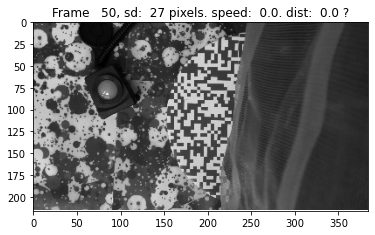

In [5]:
#Now just look at the outputs, e.g.:

bt.plotframe(50) #for example, look at frame 50

In [6]:
bt.totalwalkdist #total walk distance (pixels)

568.685498243318

t:   1%|          | 3/443 [00:00<00:22, 19.82it/s, now=None]

Moviepy - Building video demoresult.mp4.
Moviepy - Writing video demoresult.mp4



Moviepy - Done !
Moviepy - video ready demoresult.mp4


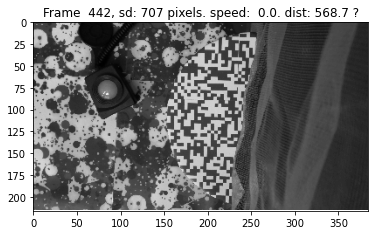

In [7]:
#this generates a new (low-res) mp4 to show the tracking behaviour
#which lets us check it's doing the right thing.
bt.makemovie('demoresult.mp4')

In [8]:
debug

> /home/mike/Documents/Research/beewalkvideotrack/beewalkvideotrack/__init__.py(155)plotframe()
    153         if clim is not None: plt.clim(clim)
    154         statechar = '?'
--> 155         if self.walk[i]==True: statechar = 'W'
    156         if self.walk[i]==False: statechar = 'F'
    157         plt.title("Frame %4d, sd: %3.0f pixels. speed: %4.1f. dist: %4.1f %s" % (i,self.stdpath[i],self.speed[i],self.dist[i],statechar))

ipdb> self.walk.shape
(444,)
ipdb> print(i)
444
ipdb> ll
    147     def plotframe(self,i,clim=None,drawparticles=False,ax=None):
    148         import matplotlib.pyplot as plt
    149 
    150         if ax is None:
    151             ax = plt.gca()
    152         ax.imshow(self.allframes[i],cmap='gray')
    153         if clim is not None: plt.clim(clim)
    154         statechar = '?'
--> 155         if self.walk[i]==True: statechar = 'W'
    156         if self.walk[i]==False: statechar = 'F'
    157         plt.title("Frame %4d, sd: %3.0f pixels. s

ipdb> print(t)
17.76
ipdb> print(t*25)
444.00000000000006
ipdb> u
> /home/mike/anaconda3/lib/python3.8/site-packages/moviepy/Clip.py(93)get_frame()
     91                 return frame
     92         else:
---> 93             return self.make_frame(t)
     94 
     95     def fl(self, fun, apply_to=None, keep_duration=True):

ipdb> ll
     77     @convert_to_seconds(['t'])
     78     def get_frame(self, t):
     79         """
     80         Gets a numpy array representing the RGB picture of the clip at time t
     81         or (mono or stereo) value for a sound clip
     82         """
     83         # Coming soon: smart error handling for debugging at this point
     84         if self.memoize:
     85             if t == self.memoized_t:
     86                 return self.memoized_frame
     87             else:
     88                 frame = self.make_frame(t)
     89                 self.memoized_t = t
     90                 self.memoized_frame = frame
     91             

ipdb> u
> <decorator-gen-180>(2)write_videofile()

ipdb> u
> /home/mike/Documents/Research/beewalkvideotrack/beewalkvideotrack/__init__.py(254)makemovie()
    250 
    251         animation = VideoClip(make_frame, duration = (len(self.allframes)-1)/25)
    252 
    253         #animation.ipython_display(fps = 25, loop = False, autoplay = True)
--> 254         animation.write_videofile(filename,fps=25)

ipdb> self.allframes.shape
(445, 216, 384)
ipdb> q


In [7]:
bt.grabhighres(100,1,10)

Loading frames
...................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

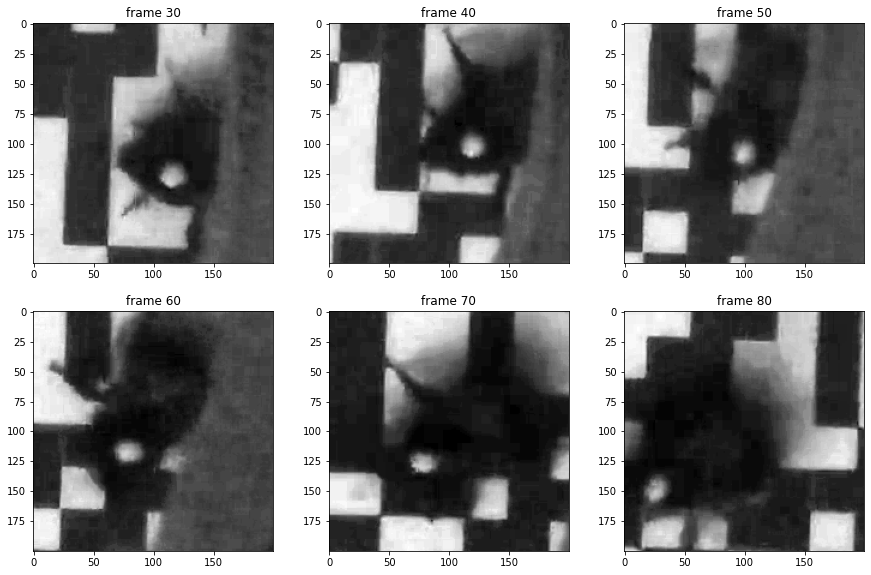

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[15,15])
figi=1
for i in range(30,90):
    if bt.highresframes[i] is not None:
        plt.subplot(3,3,figi)
        figi+=1
        plt.imshow(bt.highresframes[i],cmap='gray')
        plt.title("frame %d"  % i)
        if figi>9: break

# Batch processing

In [ ]:
#This will loop through all the images in a folder called 'data', and record how far the bee walks in each
#in a csv called 'summarywalkdist.csv'.
from glob import glob
for fn in glob('data/*.mp4'):
    newfn = fn.split('.')
    newfn = '.'.join([newfn[0]+'_track',newfn[1]])
    bt = BeeTrack(fn)
    bt.getpath()
    bt.compute_features()
    bt.makemovie(newfn)
    with open('summarywalkdist.csv', 'a') as file:
        file.write('%s,%0.1f\n' % (fn.split('/')[1],bt.totalwalkdist))